In [1]:
library(data.table)

In [2]:
library(ggplot2)

In [3]:
i = 1:55

In [4]:
n = 55

# Hypothesis 2

In [5]:
entity_edits_and_misalignment_hypothesis_2 <- read.table("../../../results/entity_categorization/hypothesis_2.tsv", header=TRUE, sep="\t")

In [6]:
entity_edits_and_misalignment_hypothesis_2 <- data.table(entity_edits_and_misalignment_hypothesis_2)

In [7]:
summary(entity_edits_and_misalignment_hypothesis_2)

   file_date      lower_quality_bot_edits lower_quality_semi_automated_edits
 Min.   :201211   Min.   :      659       Min.   :       0                  
 1st Qu.:201379   1st Qu.: 52299989       1st Qu.:   46336                  
 Median :201502   Median : 64918516       Median :  105845                  
 Mean   :201474   Mean   : 63910811       Mean   : 2246255                  
 3rd Qu.:201604   3rd Qu.: 86891862       3rd Qu.: 3266440                  
 Max.   :201706   Max.   :105371030       Max.   :12722715                  
 lower_quality_non_bot_edits lower_quality_anon_edits higher_quality_bot_edits
 Min.   :  192611            Min.   :   358           Min.   :      0         
 1st Qu.: 3495647            1st Qu.:135500           1st Qu.:   5846         
 Median :11558427            Median :283982           Median : 134104         
 Mean   :12209667            Mean   :238804           Mean   :1100312         
 3rd Qu.:20958094            3rd Qu.:335249           3rd Qu.:2178

In [8]:
# Remove last entry since edit data from last month is only for (part of?) first day
sorted_entity_edits_and_misalignment_hypothesis_2 <- dplyr::arrange(entity_edits_and_misalignment_hypothesis_2, file_date)[1:55,]

In [9]:
head(sorted_entity_edits_and_misalignment_hypothesis_2)

file_date,lower_quality_bot_edits,lower_quality_semi_automated_edits,lower_quality_non_bot_edits,lower_quality_anon_edits,higher_quality_bot_edits,higher_quality_semi_automated_edits,higher_quality_non_bot_edits,higher_quality_anon_edits
201211,659,0,192611,358,0,0,0,0
201212,165586,10894,206207,1907,0,0,0,0
201301,1859035,19679,321638,3421,0,0,0,0
201302,3743435,21714,411489,4606,0,0,0,0
201303,5636693,23330,566874,8094,0,0,0,0
201304,11826141,23742,889442,18125,0,0,0,0


In [10]:
hypothesis_2_aligned_higher_quality_human_edits = data.table(i = i, n = n)

In [11]:
hypothesis_2_aligned_lower_quality_human_edits = data.table(i = i, n = n)

In [12]:
attach(sorted_entity_edits_and_misalignment_hypothesis_2)

In [13]:
hypothesis_2_aligned_higher_quality_human_edits$p <- ((higher_quality_non_bot_edits+higher_quality_anon_edits)/(higher_quality_bot_edits + higher_quality_semi_automated_edits + higher_quality_non_bot_edits + higher_quality_anon_edits))

In [14]:
hypothesis_2_aligned_lower_quality_human_edits$p <- ((lower_quality_non_bot_edits+lower_quality_anon_edits)/(lower_quality_bot_edits + lower_quality_semi_automated_edits + lower_quality_non_bot_edits + lower_quality_anon_edits))

In [15]:
detach(sorted_entity_edits_and_misalignment_hypothesis_2)

In [16]:
hypothesis_2_aligned_higher_quality_human_edits$se = sqrt((hypothesis_2_aligned_higher_quality_human_edits$p*(1-hypothesis_2_aligned_higher_quality_human_edits$p))/n)

In [17]:
hypothesis_2_aligned_lower_quality_human_edits$se = sqrt((hypothesis_2_aligned_lower_quality_human_edits$p*(1-hypothesis_2_aligned_lower_quality_human_edits$p))/n)

In [18]:
hypothesis_2_aligned_higher_quality_human_edits$group = "aligned_higher_quality_human_edits"
hypothesis_2_aligned_lower_quality_human_edits$group = "aligned_lower_quality_human_edits"

In [19]:
grouped_hypothesis_2.dt = rbind(hypothesis_2_aligned_higher_quality_human_edits, hypothesis_2_aligned_lower_quality_human_edits)

In [20]:
grouped_hypothesis_2.dt$group = factor(grouped_hypothesis_2.dt$group)

Warning message:
“Removed 7 rows containing missing values (geom_path).”Warning message:
“Removed 7 rows containing missing values (geom_errorbar).”

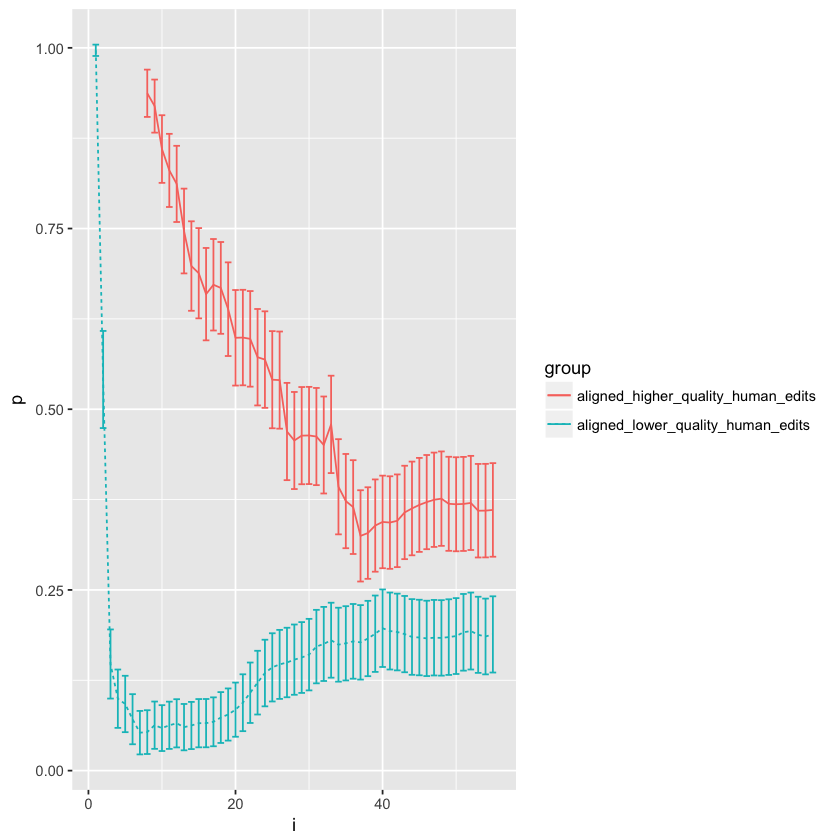

In [21]:
ggplot(grouped_hypothesis_2.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

# Hypothesis 2a

In [22]:
hypothesis_2a_aligned_higher_quality_non_bot_edits = data.table(i = i, n = n)

In [23]:
hypothesis_2a_aligned_lower_quality_non_bot_edits = data.table(i = i, n = n)

In [24]:
attach(sorted_entity_edits_and_misalignment_hypothesis_2)

In [25]:
hypothesis_2a_aligned_higher_quality_non_bot_edits$p <- ((higher_quality_non_bot_edits)/(higher_quality_bot_edits + higher_quality_semi_automated_edits + higher_quality_non_bot_edits + higher_quality_anon_edits))

In [26]:
hypothesis_2a_aligned_lower_quality_non_bot_edits$p <- ((lower_quality_non_bot_edits)/(lower_quality_bot_edits + lower_quality_semi_automated_edits + lower_quality_non_bot_edits + lower_quality_anon_edits))

In [27]:
detach(sorted_entity_edits_and_misalignment_hypothesis_2)

In [28]:
hypothesis_2a_aligned_higher_quality_non_bot_edits$se = sqrt((hypothesis_2a_aligned_higher_quality_non_bot_edits$p*(1-hypothesis_2a_aligned_higher_quality_non_bot_edits$p))/n)

In [29]:
hypothesis_2a_aligned_lower_quality_non_bot_edits$se = sqrt((hypothesis_2a_aligned_lower_quality_non_bot_edits$p*(1-hypothesis_2a_aligned_lower_quality_non_bot_edits$p))/n)

In [30]:
hypothesis_2a_aligned_higher_quality_non_bot_edits$group = "aligned_higher_quality_non_bot_edits"
hypothesis_2a_aligned_lower_quality_non_bot_edits$group = "aligned_lower_quality_non_bot_edits"

In [31]:
grouped_hypothesis_2a.dt = rbind(hypothesis_2a_aligned_higher_quality_non_bot_edits, hypothesis_2a_aligned_lower_quality_non_bot_edits)

In [32]:
grouped_hypothesis_2a.dt$group = factor(grouped_hypothesis_2a.dt$group)

Warning message:
“Removed 7 rows containing missing values (geom_path).”Warning message:
“Removed 7 rows containing missing values (geom_errorbar).”

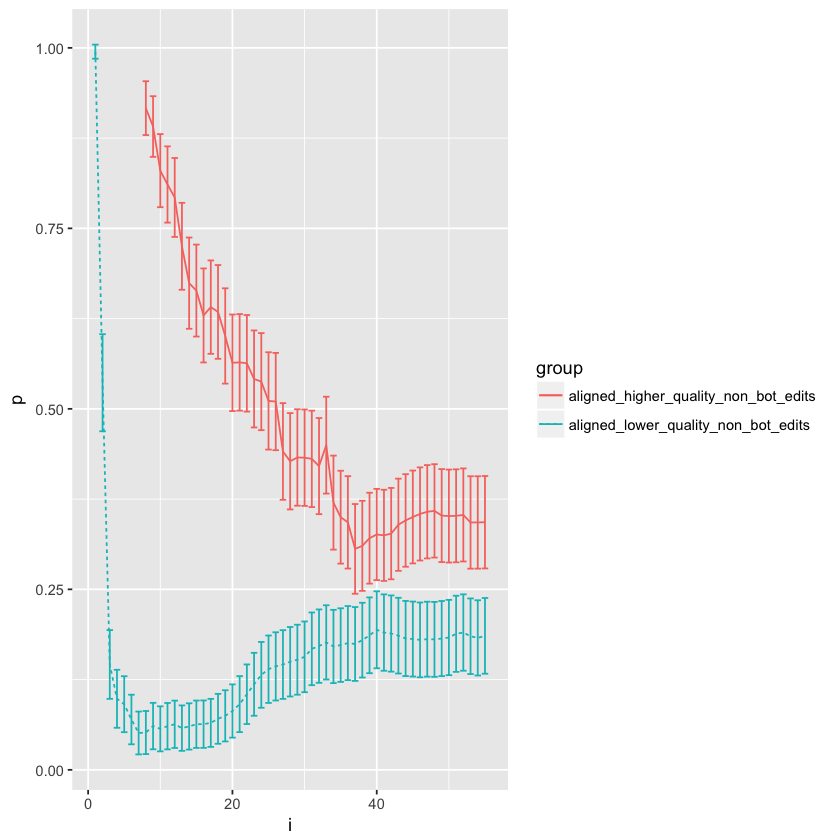

In [33]:
ggplot(grouped_hypothesis_2a.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

# Hypothesis 2b

In [34]:
hypothesis_2b_aligned_higher_quality_anon_edits = data.table(i = i, n = n)

In [35]:
hypothesis_2b_aligned_lower_quality_anon_edits = data.table(i = i, n = n)

In [36]:
attach(sorted_entity_edits_and_misalignment_hypothesis_2)

In [37]:
hypothesis_2b_aligned_higher_quality_anon_edits$p <- ((higher_quality_anon_edits)/(higher_quality_bot_edits + higher_quality_semi_automated_edits + higher_quality_non_bot_edits + higher_quality_anon_edits))

In [38]:
hypothesis_2b_aligned_lower_quality_anon_edits$p <- ((lower_quality_anon_edits)/(lower_quality_bot_edits + lower_quality_semi_automated_edits + lower_quality_non_bot_edits + lower_quality_anon_edits))

In [39]:
detach(sorted_entity_edits_and_misalignment_hypothesis_2)

In [40]:
hypothesis_2b_aligned_higher_quality_anon_edits$se = sqrt((hypothesis_2b_aligned_higher_quality_anon_edits$p*(1-hypothesis_2b_aligned_higher_quality_anon_edits$p))/n)

In [41]:
hypothesis_2b_aligned_lower_quality_anon_edits$se = sqrt((hypothesis_2b_aligned_lower_quality_anon_edits$p*(1-hypothesis_2b_aligned_lower_quality_anon_edits$p))/n)

In [42]:
hypothesis_2b_aligned_higher_quality_anon_edits$group = "aligned_higher_quality_anon_edits"
hypothesis_2b_aligned_lower_quality_anon_edits$group = "aligned_lower_quality_anon_edits"

In [43]:
grouped_hypothesis_2b.dt = rbind(hypothesis_2b_aligned_higher_quality_anon_edits, hypothesis_2b_aligned_lower_quality_anon_edits)

In [44]:
grouped_hypothesis_2b.dt$group = factor(grouped_hypothesis_2b.dt$group)

Warning message:
“Removed 7 rows containing missing values (geom_path).”Warning message:
“Removed 7 rows containing missing values (geom_errorbar).”

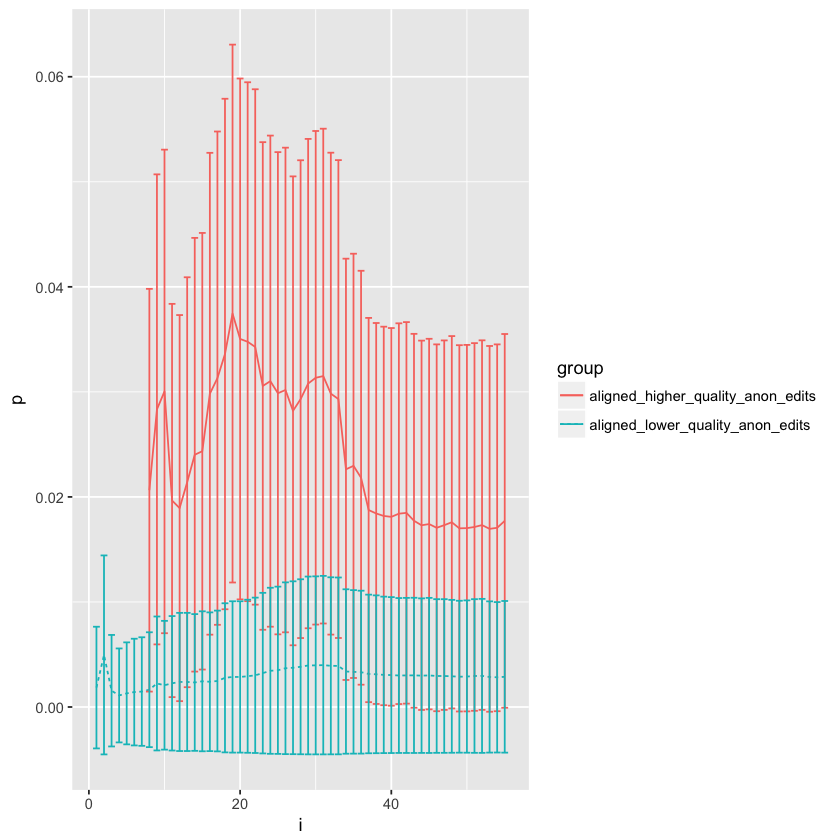

In [45]:
ggplot(grouped_hypothesis_2b.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)